# Seminar 4. Classification & Cross-validation

# Examples

## Iris Data Set
https://archive.ics.uci.edu/ml/datasets/Iris

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant

This is perhaps the best known database to be found in the pattern recognition literature. 

Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) 




** Inputs // Features // X**: Flower sizes  
  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  
<div style="width:25%; text-align:center">
<img src=http://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/iris_petal_sepal.png width=500px>
</div>

The picture is taken from a very detailed [blogpost](http://sebastianraschka.com/Articles/2014_python_lda.html) on Linear Discriminant analysis

** Output // Target // Y**: Type of iris plant
 - Iris Setosa 
 - Iris Versicolour 
 - Iris Virginica
 
<div style="width:100%; text-align:center">
<img src=http://articles.concreteinteractive.com/wp-content/uploads/2015/03/irises.png width=500px>
</div>

The picture is taken from a very detailed [blogpost](http://sebastianraschka.com/Articles/2014_python_lda.html) on Linear Discriminant analysis

##  Shuttle Landing Control Data Set
https://archive.ics.uci.edu/ml/datasets/Shuttle+Landing+Control

Determining the conditions under which an autolanding would be preferable to manual control of the spacecraft.

<div style="width:30%; text-align:center">
<img src=https://archive.ics.uci.edu/ml/assets/MLimages/Large92.jpg width=500px>
</div>

** Inputs // Features // X**: Flight conditions  

2. STABILITY: stab, xstab 
3. ERROR: XL, LX, MM, SS 
4. SIGN: pp, nn 
5. WIND: head, tail 
6. MAGNITUDE: Low, Medium, Strong, OutOfRange 
7. VISIBILITY: yes, no



** Output // Target // Y**: Type of control

Auto or manual landing


## Mice Protein Expression Data Set
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

- The data set consists of the expression levels of 77 proteins that produced detectable signals in the nuclear fraction of cortex.
- There are 38 control mice and 34 trisomic mice (Down syndrome). 
- In the experiments, 15 measurements were registered of each protein per sample/mouse. 
- Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. So, the dataset contains a total of 1080 measurements per protein. 
- Each measurement can be considered as an independent sample/mouse. 

Classes: 
 - c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
 - c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
 - c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
 - c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 

 - t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
 - t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
 - t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
 - t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 

** Inputs // Features // X**: the expression levels of 77 proteins 

** Output // Target // Y**: Control or trisomy

# Brief intro to classification algorithms

In [1]:
import seminar4_utils as utils # plot functions

/home/danger/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Logistic regression

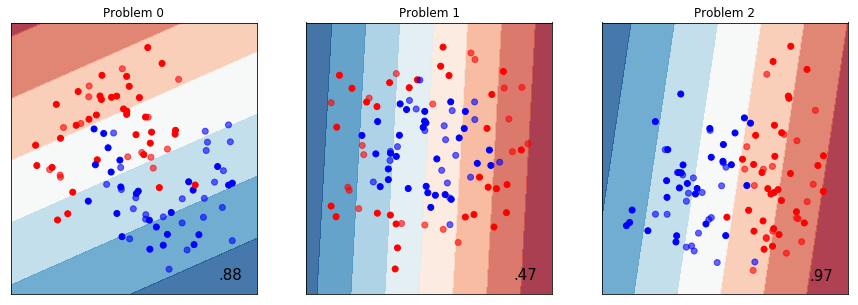

In [4]:
from sklearn.linear_model import LogisticRegression
utils.plot_clf(LogisticRegression())

## Sparcity

<div style="width:60%; text-align:center">
<img src=https://1.bp.blogspot.com/-tXq6Nl2lcNg/V3qzttiZ4sI/AAAAAAAAN_M/6nmjgwydWJUy5Kqt9gFg2Nb12BCTcD4ogCLcB/s1600/LASSO.png>
</div>

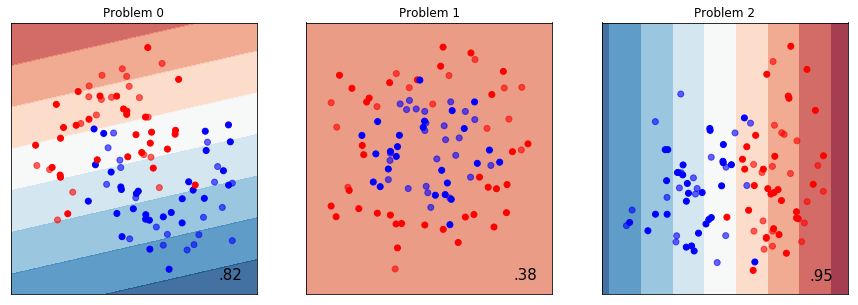

In [5]:
utils.plot_clf(LogisticRegression(C=1e-1, penalty='l1'))

## Support vector machine

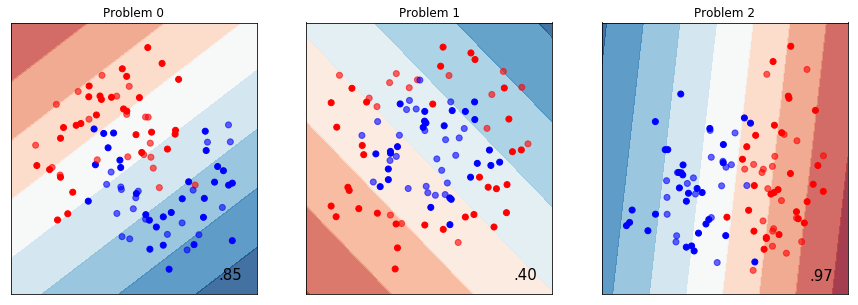

In [15]:
from sklearn.svm import SVC # SVC means Support Vector Classifier
utils.plot_clf(SVC(kernel='linear'))

** Kernel trick**. Main idea
* SVM builds a linear decision boundary in a feature space
* Some problems cannot be solved by a linear method (Problem 1 above)
* But what if we somehow transform our feature space?
* For example, use $x_1^2,\; x_1 x_2, \; x_2^2$ as features?

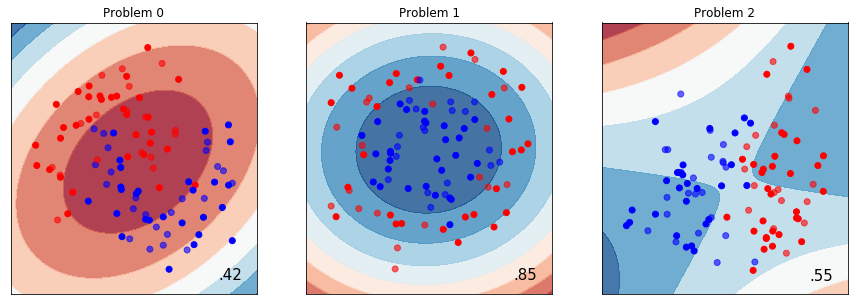

In [8]:
# reload(utils)
utils.plot_clf(SVC(kernel='poly', degree=2))

#### We can even use infinite-dimensional vector spaces!

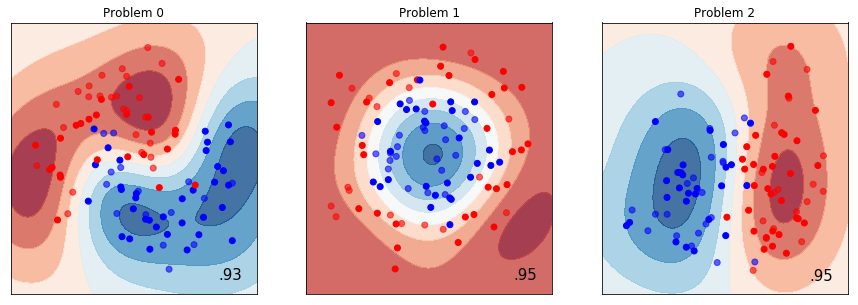

In [16]:
utils.plot_clf(SVC(kernel='rbf'))

#  Example: Mice classification

TODO: 1. Import pandas

In [17]:
import pandas as pd

TODO: 2. Load the Mice data set (check out *pd.read_* functions) and have a look at it

*tip*: add index_col='MouseID' to yuor reading function to use Mouse Id as an index

In [18]:
#path_to_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
path_to_data = 'Data_Cortex_Nuclear.xls'
data = pd.read_excel(path_to_data, index_col='MouseID')
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [19]:
data.count()

DYRK1A_N           1077
ITSN1_N            1077
BDNF_N             1077
NR1_N              1077
NR2A_N             1077
pAKT_N             1077
pBRAF_N            1077
pCAMKII_N          1077
pCREB_N            1077
pELK_N             1077
pERK_N             1077
pJNK_N             1077
PKCA_N             1077
pMEK_N             1077
pNR1_N             1077
pNR2A_N            1077
pNR2B_N            1077
pPKCAB_N           1077
pRSK_N             1077
AKT_N              1077
BRAF_N             1077
CAMKII_N           1077
CREB_N             1077
ELK_N              1062
ERK_N              1077
GSK3B_N            1077
JNK_N              1077
MEK_N              1073
TRKA_N             1077
RSK_N              1077
                   ... 
RRP1_N             1080
BAX_N              1080
ARC_N              1080
ERBB4_N            1080
nNOS_N             1080
Tau_N              1080
GFAP_N             1080
GluR3_N            1080
GluR4_N            1080
IL1B_N             1080
P3525_N         

In [20]:
# We have 3 points with large number of NAs. Here we drop them
print(data.shape)
data.dropna(thresh=70, axis=0, inplace=True)
print(data.shape)

(1080, 81)
(1077, 81)


TODO: 3. Identify features (X) and targets (y)

 - c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
 - c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
 - c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
 - c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 

 - t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
 - t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
 - t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
 - t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 

In [21]:
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


TODO: 4. Split your data into X and y

*tip* you can assign data to X and drop unnecessary columns via drop() method

In [22]:
X = data.copy()
X.drop(['Genotype', 'Treatment', 'Behavior', 'class'], axis=1, inplace=True)

TODO: 5. Decode Genotype: Control as 0, Ts65Dn as 1
    
*tip* example from the titanic dataset: sex decoding

titanic.sex = titanic.sex.map({"male":0, "female":1})

In [23]:
y = data['Genotype']
y = y.map({"Control":0, "Ts65Dn":1})

TODO: 6. Check NA values via count() and then drop columns with NaNs via dropna()

*tip* check that you specify the correct axes to drop columns (and not rows)

In [24]:
X.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [25]:
X.dropna(axis=1, inplace=True)
X.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730


# Cross-validation

In [19]:
import sklearn

In [20]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# LogisticRegressionCV automatically select regularization parameter C

In [24]:
clf = LogisticRegressionCV()
clf.fit(X, y)
print('Accuracy when trained on all dataset', np.mean(clf.predict(X) == y))

('Accuracy when trained on all dataset', 0.98328690807799446)


In [22]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify = None, random_state = 0)

# TODO: 7. Fit on train set & estimate accuracy on the test set
clf = LogisticRegressionCV()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy when trained on a training subset', np.mean(y_pred == y_test))
# error is a little bit higher

('Accuracy when trained on a training subset', 0.97222222222222221)


## Kfolds CV

Example of 5-fold

<div style="width:60%; text-align:center">
<img src=http://vinhkhuc.github.io/assets/2015-03-01-cross-validation/5-fold-cv.png>
</div>

In [26]:
from sklearn.model_selection import cross_val_score, KFold
# KFold split your data
# cross_val_score automatically builds K models and then estimates errors on the corresponding test sets

In [27]:
kfold = KFold(n_splits=5) # 5-fold CV
cv = kfold.split(X, y) # show data & make the split

clf = LogisticRegressionCV()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

KFold score: 0.298 ± 0.252


#### Wow! Significant drop in accuracy and rise in std across folds.  The reason is that the labels are ordered

In [36]:
# check the order
y

MouseID
309_1       0
309_2       0
309_3       0
309_4       0
309_5       0
309_6       0
309_7       0
309_8       0
309_9       0
309_10      0
309_11      0
309_12      0
309_13      0
309_14      0
309_15      0
311_1       0
311_2       0
311_3       0
311_4       0
311_5       0
311_6       0
311_7       0
311_8       0
311_9       0
311_10      0
311_11      0
311_12      0
311_13      0
311_14      0
311_15      0
           ..
J1291_1     1
J1291_2     1
J1291_3     1
J1291_4     1
J1291_5     1
J1291_6     1
J1291_7     1
J1291_8     1
J1291_9     1
J1291_10    1
J1291_11    1
J1291_12    1
J1291_13    1
J1291_14    1
J1291_15    1
J3295_1     1
J3295_2     1
J3295_3     1
J3295_4     1
J3295_5     1
J3295_6     1
J3295_7     1
J3295_8     1
J3295_9     1
J3295_10    1
J3295_11    1
J3295_12    1
J3295_13    1
J3295_14    1
J3295_15    1
Name: Genotype, dtype: int64

In [28]:
# TODO: 8. Try KFold with shuffle=True 
kfold = KFold(n_splits=5, shuffle=True)
cv = kfold.split(X, y)

clf = LogisticRegressionCV()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('Shuffled KFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

Shuffled KFold score: 0.964 ± 0.012


#### So, we restore our good accuracy 

## Label(Group) split

#### We have 15 measurments per mouse in the dataset, and our validation scheme doesn't take this fact into account. Let's fix that using group split

In [29]:
# 15 measurments for the same mouse seem to be correlated
X.head(20)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
MouseID,,,,,,,,,,,,,,,,,,,,,
309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652
309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610
309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427
309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563
309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730
309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.244485,1.507777,2.003535,0.120687,0.920178,0.843679,0.190469,0.106476,0.439833,1.816389
309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.238006,1.338782,1.861708,0.117041,1.028770,0.798284,0.181610,0.097834,0.406293,1.528484
309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.241435,1.386076,1.969451,0.116878,0.943544,0.843966,0.191561,0.099494,0.382532,1.652658
309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.236015,1.404178,1.958736,0.113864,0.946910,0.832182,0.186378,0.105145,0.435687,1.834599


In [30]:
# generat list of mice_ids
mice_id = X.index.map(lambda x: x.split('_')[0])
mice_id

array([u'309', u'309', u'309', ..., u'J3295', u'J3295', u'J3295'], dtype=object)

In [31]:
from sklearn.model_selection import GroupKFold
# GroupKFold allows to put all points with coincident labels into the single set (training one or validation one) 

In [32]:
group_kfold = GroupKFold(n_splits=5)
cv = group_kfold.split(X, y, groups=mice_id) #we explicitly define our groups using mice_id

scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
print('LabelKFold score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()) )

LabelKFold score: 0.853 ± 0.098


#### Classification accuracy is dropped. The reason is that there is no leak in our data anymore - we can't use data from "validation" mice during training

## Cross-validation: summary
- Do not estimate accuracy on the train set, use a separate validation set
- If your labels are ordered, don't forget to shuffle your data
- If you have any groups in your dataset, you have to use GroupKFold to estimate quality of your model

# Metrics for classification accuracy

## Precision & Recall
A wonderfull picture from Wikipedia
<div style="width:75%; text-align:center">
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/525px-Precisionrecall.svg.png width=500px>
</div>


F1 = 2 \* (precision \* recall) / (precision + recall)

In [33]:
from sklearn.cross_validation import cross_val_predict
# cross_val_predict internally do KFold cross-validation, calculate predictions on validation sets
# and then merge predictions into a single vector of predictions
from sklearn.metrics import classification_report
#classification_report gives several quality metrics. It can be used for multiclass problems

y_pred = cross_val_predict(LogisticRegressionCV(), X, y)
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.56      0.63       570
          1       0.61      0.77      0.68       507

avg / total       0.67      0.66      0.65      1077



####  By default cross_val_predict use KFold without suffle, so the quality is dropped again. We can explicitly specify the correct CV scheme

In [34]:
# new-style sklearn interface:
kfold = GroupKFold(n_splits=5)
y_pred = cross_val_predict(LogisticRegressionCV(), X, y, cv=kfold.split(X, y, mice_id))
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.82      0.85       570
          1       0.81      0.90      0.85       507

avg / total       0.86      0.85      0.85      1077



# Links
 - [A blog post on cross validation](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html)
 - Also, check out two other posts from the same series "Model evaluation, model selection, and algorithm selection in machine learning": [The basics](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) and [Bootstrapping and uncertainties](http://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html)